## Explora dados da Itália

### A nível de região

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_json('/home/fpelogia/Documentos/HMP/Italia/dpc-covid19-ita-regioni.json')

In [18]:
data.head(1)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,None,NaN,None,None,NaN,NaN,NaN,NaN,None,None


In [17]:
columns = np.array(data.columns)
columns

array(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare',
       'totale_positivi', 'variazione_totale_positivi', 'nuovi_positivi',
       'dimessi_guariti', 'deceduti', 'casi_da_sospetto_diagnostico',
       'casi_da_screening', 'totale_casi', 'tamponi', 'casi_testati',
       'note', 'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido',
       'tamponi_test_molecolare', 'tamponi_test_antigenico_rapido',
       'codice_nuts_1', 'codice_nuts_2'], dtype=object)

Tradução

['date', 'status', 'region_code', 'region_name', 'lat',
       'long', 'hospitalized_with_symptoms', 'intensive_care',
       'total_hospitalized', 'home_isolation',
       'total_positive', 'change_total_positive', 'new_positive',
       'discharged_healed', 'deceased', 'cases_from_diagnostic_suspicion',
       'cases_from_screening', 'total_cases', 'swabs', 'cases_tested',
       'notes', 'intensive_therapy_inputs', 'notes_test', 'notes_cases',
       'total_positive_test_molecular',
       'total_positive_antigenic_rapid_test',
       'swabs_molecular_test', 'swabs_antigenic_rapid_test',
       'code_nuts_1', 'code_nuts_2']

In [39]:
cols_to_keep = ['data', 'denominazione_regione', 'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati', 'totale_positivi', 'variazione_totale_positivi', 'nuovi_positivi', 'deceduti', 'totale_casi', 'ingressi_terapia_intensiva']
cols_to_drop = [col for col in columns if col not in cols_to_keep]
data_regions = data.drop(columns = cols_to_drop)

In [41]:
data_regions['denominazione_regione'].unique()

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'P.A. Bolzano', 'P.A. Trento', 'Piemonte', 'Puglia',
       'Sardegna', 'Sicilia', 'Toscana', 'Umbria', "Valle d'Aosta",
       'Veneto'], dtype=object)

In [93]:
data_lombardy = data_regions[data_regions['denominazione_regione'] == "Lombardia"]
data_lombardy = data_lombardy[np.logical_and(data_lombardy.data >= '2020-02-25', data_lombardy.data <= '2020-04-03')]
data_lombardy.head(3)

,data,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,totale_positivi,variazione_totale_positivi,nuovi_positivi,deceduti,totale_casi,ingressi_terapia_intensiva
29,2020-02-25T18:00:00,Lombardia,79,25,104,231,65,68,9,240,NaN
50,2020-02-26T18:00:00,Lombardia,79,25,104,249,18,18,9,258,NaN
71,2020-02-27T18:00:00,Lombardia,172,41,213,349,100,145,14,403,NaN


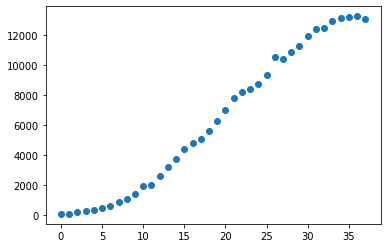

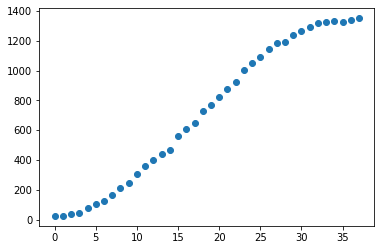

In [94]:
plt.scatter(np.arange(0, len(data_lombardy['totale_ospedalizzati'])), data_lombardy['totale_ospedalizzati'])
plt.show()
plt.scatter(np.arange(0, len(data_lombardy['terapia_intensiva'])), data_lombardy['terapia_intensiva'])
plt.show()